# importar recursos

In [47]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

!pip install -U spacy
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_lg


# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\errors.py", line 3, in <module>
    from .compat import Literal
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\__init__.py", line 5, in <module>
    from .config import registry
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\config.py", line 5, in <module>
    from .types import Decorator
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\types.py", line 25, in <module>
    from .compat import cupy, has_cupy
  File "c:\Users\USER\anaconda3\Lib\s

# Bases de datos periodico el espectador

In [48]:
# Lista de URLs de la base de datos El espectador 
BASE_DATOS_espectador= [
'https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-terquedad-de-la-guerra/',
'https://www.elespectador.com/opinion/editorial/la-corte-constitucional-apoya-la-paz-total-con-estructura/',
'https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/predial-tierra-y-paz/',
'https://www.elespectador.com/opinion/columnistas/daniel-garcia-pena/repensando-la-paz-total/',
'https://www.elespectador.com/opinion/editorial/una-oportunidad-para-corregir-el-rumbo-de-la-paz/',
'https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/eln-quiere-la-paz-o-su-dictadura-armada/',
'https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-paz-como-cultura/',
'https://www.elespectador.com/opinion/columnistas/yesid-reyes-alvarado/cambie-de-opinion-sobre-la-ley-de-paz-total/',
'https://www.elespectador.com/opinion/columnistas/maria-alejandra-villamizar/obstruir-la-paz/',
'https://www.elespectador.com/opinion/columnistas/maria-teresa-ronderos/otra-negociacion-de-paz-sobre-terreno-quebrado/',
'https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/paz-volver-a-barajar/',
'https://www.elespectador.com/opinion/editorial/el-acuerdo-de-paz-no-entrego-al-pais/',
'https://www.elespectador.com/opinion/columnistas/felipe-zuleta-lleras/cual-paz-total/',
'https://www.elespectador.com/opinion/columnistas/mario-morales/nueve-procesos-de-paz-y-una-guerra-sin-cuartel/',
'https://www.elespectador.com/opinion/editorial/que-el-cese-al-fuego-perdure-y-lleve-a-un-acuerdo-de-paz/',
'https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-paz-en-construccion/',
'https://www.elespectador.com/opinion/editorial/la-esperanza-de-paz-no-admite-tantas-ambivalencias/',
'https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/notas-de-paz/',
'https://www.elespectador.com/opinion/columnistas/alejandro-alvarez/gobernabilidad-y-paz/',
'https://www.elespectador.com/opinion/columnistas/aldo-civico/el-desafio-de-la-paz/',
'https://www.elespectador.com/opinion/columnistas/pedro-viveros/paz-total-en-la-casa-de-narino/',
'https://www.elespectador.com/opinion/columnistas/cristina-nicholls/a-donde-se-fue-el-entusiasmo-por-la-paz/',
'https://www.elespectador.com/opinion/columnistas/oscar-sevillano/me-gusta-la-paz-total-pero/',
'https://www.elespectador.com/opinion/columnistas/juan-manuel-ospina/la-paz-total-simplemente-una-bella-aspiracion/',
'https://www.elespectador.com/opinion/columnistas/yolanda-ruiz/la-paz-entre-los-pacificadores/',
'https://www.elespectador.com/opinion/columnistas/gustavo-gallon/para-lograr-una-cultura-para-vivir-en-paz/',
'https://www.elespectador.com/opinion/columnistas/mario-morales/si-quieren-paz/',
'https://www.elespectador.com/opinion/columnistas/william-ospina/la-otra-paz/',
'https://www.elespectador.com/opinion/columnistas/juan-david-ochoa/paz-sobre-el-pantano/',
'https://www.elespectador.com/opinion/columnistas/alejandro-reyes-posada/las-cuatro-dimensiones-de-la-paz-total/',
'https://www.elespectador.com/opinion/columnistas/hernando-roa-suarez/la-paz-si-avancemos/',
'https://www.elespectador.com/opinion/columnistas/felipe-zuleta-lleras/gestores-de-paz/',
'https://www.elespectador.com/opinion/columnistas/gonzalo-mallarino/jovenes-en-pro-de-la-paz/',
'https://www.elespectador.com/opinion/columnistas/gustavo-gallon/construccion-de-paz-como-proyecto-nacional/',
'https://www.elespectador.com/opinion/columnistas/beatriz-miranda/regalemos-paz/',
'https://www.elespectador.com/opinion/columnistas/ramiro-bejarano-guzman/paz-total-itaria/',
'https://www.elespectador.com/opinion/columnistas/nicolas-rodriguez/la-paz-total-se-construye-a-pedacitos/',
'https://www.elespectador.com/opinion/columnistas/gustavo-gallon/hacia-la-paz-territorial/',
'https://www.elespectador.com/opinion/columnistas/julian-de-zubiria-samper/la-educacion-la-convivencia-y-la-paz/',
'https://www.elespectador.com/opinion/columnistas/eduardo-barajas-sandoval/la-mejor-contribucion-a-la-paz/',
'https://www.elespectador.com/opinion/columnistas/sergio-ocampo-madrid/un-quinto-pilar-para-la-paz-total/',
'https://www.elespectador.com/opinion/columnistas/nicolas-rodriguez/el-monopolio-de-la-paz/',
'https://www.elespectador.com/opinion/columnistas/beatriz-vanegas-athias/la-guerra-es-la-paz/',
'https://www.elespectador.com/opinion/columnistas/salomon-kalmanovitz/paz-total/',
'https://www.elespectador.com/opinion/columnistas/mauricio-botero-caicedo/paz-total-un-espejismo/',
'https://www.elespectador.com/opinion/columnistas/luis-carvajal-basto/un-nuevo-plan-colombia-para-una-paz-total/',
'https://www.elespectador.com/opinion/columnistas/jaime-arocha/acostumbrarnos-al-modo-paz/',
'https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/paz-total-o-guerra-sin-fin/',
'https://www.elespectador.com/opinion/columnistas/aldo-civico/paz-consciente/',
'https://www.elespectador.com/opinion/editorial/pese-a-las-dificultades-vale-la-pena-insistir-en-la-paz/',
'https://www.elespectador.com/opinion/columnistas/grivera/una-segunda-oportunidad-para-la-paz/',
'https://www.elespectador.com/opinion/columnistas/gonzalo-mallarino/como-llevar-paz/',
'https://www.elespectador.com/opinion/editorial/ahora-si-podemos-construir-consenso-sobre-la-paz/',
'https://www.elespectador.com/opinion/columnistas/paul-krugman/el-comercio-ayuda-a-fomentar-la-paz-no-siempre/',
'https://www.elespectador.com/opinion/columnistas/catalina-ruiz-navarro/paz-de-que-hablamos/',
'https://www.elespectador.com/opinion/columnistas/elisabeth-ungar-bleier/ni-paz-ni-legalidad/',
'https://www.elespectador.com/opinion/columnistas/gonzalo-silva-rivas/catalizador-de-la-paz/',
'https://www.elespectador.com/opinion/columnistas/sergio-ocampo-madrid/la-paz-ahi-va-ahi-va/',
'https://www.elespectador.com/opinion/editorial/aun-no-es-tarde-para-construir-la-paz/',
'https://www.elespectador.com/opinion/columnistas/alfredo-molano-jimeno/las-bajas-de-la-paz/',
'https://www.elespectador.com/opinion/columnistas/humberto-de-la-calle/paz-subterranea/',
'https://www.elespectador.com/opinion/editorial/no-podemos-desfallecer-en-la-construccion-de-la-paz/',
'https://www.elespectador.com/opinion/columnistas/jorge-ivan-cuervo-r-/la-paz-esquiva/',
'https://www.elespectador.com/opinion/columnistas/dolly-montoya-castano/que-estamos-haciendo-por-la-paz/',
'https://www.elespectador.com/opinion/editorial/apostarle-a-la-paz-sigue-siendo-necesario/',
'https://www.elespectador.com/opinion/columnistas/santiago-villa/el-miedo-a-la-paz/',
'https://www.elespectador.com/opinion/columnistas/valentina-coccia/la-paz-del-silencio-column/',
'https://www.elespectador.com/opinion/columnistas/luis-felipe-henao/matando-la-paz-column/',
'https://www.elespectador.com/opinion/columnistas/luis-felipe-henao/maquinas-de-paz-column/',
'https://www.elespectador.com/opinion/columnistas/elisabeth-ungar-bleier/la-diaspora-colombiana-construyendo-paz-column/',
'https://www.elespectador.com/opinion/columnistas/mauricio-rubio/beneficios-economicos-de-la-paz-column/',
'https://www.elespectador.com/opinion/columnistas/tatiana-acevedo-guerrero/paz-pasajera-column/',
'https://www.elespectador.com/opinion/columnistas/eduardo-barajas-sandoval/aniversario-de-una-paz-incierta-column/',
'https://www.elespectador.com/opinion/columnistas/ramiro-bejarano-guzman/ni-paz-ni-verdad-column/',
'https://www.elespectador.com/opinion/columnistas/cristo-garcia-tapia/la-paz-si-esta-en-peligro-column/',
'https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/la-paz-sitiada-column/',
'https://www.elespectador.com/opinion/columnistas/carlos-enrique-moreno/paz-las-fichas-pendientes-column/',
'https://www.elespectador.com/opinion/columnistas/beatriz-miranda/con-hambre-no-hay-paz-column/',
'https://www.elespectador.com/opinion/columnistas/hernando-roa-suarez/profundizar-la-democracia-e-implementar-la-paz-column/',
'https://www.elespectador.com/opinion/columnistas/luis-carvajal-basto/si-la-paz-esta-por-construirse-column/',
'https://www.elespectador.com/opinion/columnistas/luis-i-sandoval-m/sembrar-paz-para-cosechar-vida-column/',
'https://www.elespectador.com/opinion/columnistas/luis-carvajal-basto/nuestra-paz-inconclusa-column/',
'https://www.elespectador.com/opinion/columnistas/william-ospina/la-paz-verdadera-column/',
'https://www.elespectador.com/opinion/columnistas/dolly-montoya-castano/la-paz-sigue-siendo-el-foco-column/',
'https://www.elespectador.com/opinion/columnistas/sergio-otalora-montenegro/la-paz-del-siglo-xxi-column-920922/',
'https://www.elespectador.com/opinion/columnistas/columnista-invitado-ee/paz-y-solidaridad-el-motor-de-nuestra-union-column-918644/',
'https://www.elespectador.com/opinion/columnistas/sergio-ocampo-madrid/jodidos-ni-guerra-ni-paz-column-906065/',
'https://www.elespectador.com/opinion/columnistas/ivan-cepeda-castro/cual-es-el-significado-de-la-paz-total-column-903306/',
'https://www.elespectador.com/opinion/columnistas/maria-antonieta-solorzano/solo-la-dignidad-construye-paz-column-901638/',
'https://www.elespectador.com/opinion/columnistas/yesid-reyes-alvarado/una-paz-epidermica-column-899551/',
'https://www.elespectador.com/colombia/mas-regiones/cual-es-la-percepcion-de-los-colombianos-sobre-la-paz-article/',
'https://www.elespectador.com/opinion/editorial/el-gobierno-no-debe-dar-clases-de-prensa-libre/',
'https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-terquedad-de-la-guerra/',
'https://www.elespectador.com/opinion/editorial/hostigamiento-de-la-fiscalia-a-la-prensa/',
'https://www.elespectador.com/opinion/columnistas/mauricio-garcia-villegas/falacia-ad-hominem/',
'https://www.elespectador.com/opinion/columnistas/lariza-pizano/ideas-para-la-libertad/',
'https://www.elespectador.com/opinion/columnistas/columnista-invitado-ee/democracia-y-libertad-de-expresion-en-retroceso-en-america-latina/',
'https://www.elespectador.com/opinion/columnistas/pascual-gaviria/la-fuente-de-la-discordia/',
'https://www.elespectador.com/opinion/columnistas/claudia-morales/mucha-soberbia-y-actos-de-contricion-esquivos/',
'https://www.elespectador.com/opinion/columnistas/santiago-villa/medios-y-censura/',
'https://www.elespectador.com/opinion/columnistas/cecilia-orozco-tascon/hipocresia-y-libertad-de-prensa/',
'https://www.elespectador.com/opinion/columnistas/ana-cristina-restrepo-jimenez/sobre-la-libertad/',
'https://www.elespectador.com/opinion/columnistas/mauricio-botero-caicedo/peligra-la-libertad-de-prensa/',
'https://www.elespectador.com/opinion/columnistas/ramiro-bejarano-guzman/reacciones-riesgosas/',
'https://www.elespectador.com/opinion/columnistas/arturo-guerrero/un-recorrido-por-la-lacra-nacional/',
'https://www.elespectador.com/opinion/editorial/no-hay-libertad-de-prensa-sin-seguridad/',
'https://www.elespectador.com/opinion/editorial/estigmatizar-desde-la-funcion-publica-no-es-libertad-de-culto/',
'https://www.elespectador.com/opinion/columnistas/elisabeth-ungar-bleier/derecho-a-oponerse-y-disentir/',
'https://www.elespectador.com/opinion/columnistas/mario-morales/a-su-suerte/',
'https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/libertad-y-otras-artes/',
'https://www.elespectador.com/opinion/columnistas/carlos-granes/el-sacrificio-de-la-libertad-en-el-altar-de-la-justicia/',
'https://www.elespectador.com/opinion/columnistas/juan-david-zuloaga-d-/los-limites-de-la-libertad/',
'https://www.elespectador.com/opinion/columnistas/tatiana-acevedo-guerrero/amenazas-a-la-libertad/',
'https://www.elespectador.com/opinion/columnistas/santiago-villa/libertad-de-odio/',
'https://www.elespectador.com/opinion/columnistas/catalina-ruiz-navarro/que-es-discurso-de-odio/',
'https://www.elespectador.com/opinion/editorial/periodismo-bajo-ataque/',
'https://www.elespectador.com/opinion/columnistas/reinaldo-spitaletta/petro-capitalismo-y-libertad/',
'https://www.elespectador.com/opinion/columnistas/fernando-araujo-velez/en-estado-de-libertad/',
'https://www.elespectador.com/opinion/columnistas/columnista-invitado-ee/los-derechos-humanos-y-libertades-fundamentales-deben-ser-salvaguardados-al-elegir/',
'https://www.elespectador.com/opinion/columnistas/rodrigo-uprimny/la-libertad-es-para-quien-piensa-distinto/',
'https://www.elespectador.com/opinion/columnistas/isabel-segovia/libertad-vs-vacunacion/',
'https://www.elespectador.com/judicial/ciudadanas-de-segunda-sin-igualdad-completa-ni-libertad/',
'https://www.elespectador.com/opinion/columnistas/sergio-otalora-montenegro/mi-libertad-de-contagiar-a-los-demas/',
'https://www.elespectador.com/economia/libertad-una-coleccion-que-invita-a-comprar-local-y-en-digital-article/',
'https://www.elespectador.com/el-magazin-cultural/sobre-la-libertad-y-el-debate-abierto-en-colombia-article/',
'https://www.elespectador.com/opinion/lectores/cartas/blogs-y-libertad-de-expresion-column/',
'https://www.elespectador.com/opinion/columnistas/isabel-segovia/con-miedo-y-sin-libertad-opinion-el-espectador-column/',
'https://www.elespectador.com/opinion/columnistas/juan-manuel-ospina/lo-de-la-libertad-no-es-cuento-column-920534/',
'https://www.elespectador.com/opinion/editorial/cuando-la-fiscalia-interviene-medios-la-democracia-pierde/',
'https://www.elespectador.com/opinion/columnistas/francisco-gutierrez-sanin/democracias-en-problemas/',
'https://www.elespectador.com/opinion/columnistas/carolina-botero-cabrera/se-achica-el-debate-democratico/',
'https://www.elespectador.com/opinion/columnistas/julio-borges/la-democracia-en-transicion/',
'https://www.elespectador.com/opinion/columnistas/yesid-reyes-alvarado/democracia-y-diversidad-de-opiniones/',
'https://www.elespectador.com/responsabilidad-social/region-en-accion/organizaciones-sociales-participativas-para-una-democracia-solida/',
'https://www.elespectador.com/opinion/columnistas/pablo-felipe-robledo/que-triste-democracia/',
'https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/valorar-la-democracia/',
'https://www.elespectador.com/colombia-20/analistas/el-derecho-fundamental-a-la-protesta-una-deuda-con-la-paz-y-la-democracia/',
'https://www.elespectador.com/opinion/columnistas/pedro-viveros/elecciones-en-una-democracia-confusa/',
'https://www.elespectador.com/opinion/columnistas/hector-abad-faciolince/paradojas-de-la-democracia/',
'https://www.elespectador.com/opinion/columnistas/tomas-molilna/el-lujo-de-los-congresistas-es-incompatible-con-la-democracia/',
'https://www.elespectador.com/opinion/editorial/la-democracia-aunque-incomode-no-es-un-estorbo/',
'https://www.elespectador.com/colombia-20/analistas/derechos-humanos-democracia-estado-colombiano-y-paz-total/',
'https://www.elespectador.com/opinion/columnistas/jorge-ivan-cuervo-r-/liberalismo-democracia-populismo/',
'https://www.elespectador.com/opinion/columnistas/juan-manuel-ospina/una-democracia-sin-partidos-es-una-mentira-2/',
'https://www.elespectador.com/opinion/columnistas/augusto-trujillo-munoz/verdadera-y-falsa-democracia/',
'https://www.elespectador.com/opinion/columnistas/gustavo-gallon/por-una-democracia-sin-violencia/',
'https://www.elespectador.com/colombia-20/analistas/participacion-decisiva-fruto-de-la-democracia/',
'https://www.elespectador.com/opinion/columnistas/pedro-viveros/transicion-menos-consensos-mas-democracia/',
'https://www.elespectador.com/opinion/editorial/vamos-a-cuidar-la-democracia/',
'https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/colombia-se-juega-su-democracia/',
'https://www.elespectador.com/opinion/lectores/antieditorial/el-modelo-economico-deteriora-la-democracia/',
'https://www.elespectador.com/opinion/editorial/estigmatizar-al-contrario-no-es-democratico/',
'https://www.elespectador.com/opinion/columnistas/yolanda-ruiz/democracia-y-confianza/',
'https://www.elespectador.com/opinion/columnistas/tomas-molilna/de-la-desigualdad-radical-viene-la-injusticia/',
'https://www.elespectador.com/opinion/columnistas/leopoldo-villar-borda/justicia-made-in-usa/',
'https://www.elespectador.com/opinion/editorial/justicia-contra-el-abuso-sexual/',
'https://www.elespectador.com/opinion/columnistas/claudia-morales/la-justicia-llego-pero-le-tiraron-la-puerta-en-la-cara/',
'https://www.elespectador.com/justicia-inclusiva/justicia-para-las-victimas-en-colombia-historias-de-exito-en-2023/',
'https://www.elespectador.com/opinion/editorial/puede-haber-concesiones-por-la-paz-sin-suplantar-la-justicia/',
'https://www.elespectador.com/opinion/columnistas/nicolas-rodriguez/secuestro-y-justicia-especial-para-la-paz/',
'https://www.elespectador.com/opinion/columnistas/rodrigo-uprimny/paz-total-justicia-y-derechos-de-las-victimas/',
'https://www.elespectador.com/opinion/columnistas/yesid-reyes-alvarado/la-falta-de-confianza-en-la-justicia/',
'https://www.elespectador.com/opinion/columnistas/grivera/la-justicia-no-es-venganza/',
'https://www.elespectador.com/bogota/violencia-contra-las-mujeres-custodias-de-menores-y-justicia/',
'https://www.elespectador.com/bogota/9-s-cuando-la-justicia-cojea-para-unos-y-avanza-para-otros/',
'https://www.elespectador.com/opinion/columnistas/cartas-de-los-lectores/la-justicia-paquidermica/',
'https://www.elespectador.com/judicial/la-masacre-de-la-familia-turbay-cote-un-capitulo-sin-verdad-ni-justicia-article/',
'https://www.elespectador.com/colombia-20/paz-y-memoria/la-justicia-y-la-verdad-avanzan-para-las-victimas-article/',
'https://www.elespectador.com/colombia-20/analistas/justicia-para-las-victimas-de-brutalidad-policial-article/',
'https://www.elespectador.com/opinion/columnistas/rodrigo-uprimny/secuestro-guerra-y-paz-column/',
'https://www.elespectador.com/justicia-inclusiva/la-guerra-contra-la-justicia-el-capitulo-olvidado-del-conflicto-colombiano/',
'https://www.elespectador.com/opinion/columnistas/cecilia-orozco-tascon/libertad-de-opinion-y-critica-parapeto-de-delincuentes/',
'https://www.elespectador.com/opinion/columnistas/carlos-enrique-moreno/libertad-economica-y-prosperidad/',
]

# Lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "El espectador"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_espectador:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

    # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all(class_="font--secondary")

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer autor
    autor_div = soup.find("div", class_="ArticleHeader-Author")
    autor = autor_div.text.strip() if autor_div else "Autor no encontrado"

    # Extraer fecha de publicación
    fecha_div = soup.find("div", class_="Datetime ArticleHeader-Date")
    fecha = fecha_div.text.strip() if fecha_div else "Fecha no encontrada"

    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)


# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoselespectador_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)


                                       Autor  \
0                         Gloria Arias Nieto   
1                              El Espectador   
2                       Cristina de la Torre   
3                         Daniel García-Peña   
4                              El Espectador   
..                                       ...   
168  Centro de Memoria, Paz y Reconciliación   
169                          Rodrigo Uprimny   
170                   Tomás Tarazona Ramírez   
171                    Cecilia Orozco Tascón   
172                    Carlos Enrique Moreno   

                       Fecha de Publicación  Número de Palabras  \
0     05 de diciembre de 2023 - 02:00 a. m.                 638   
1     04 de diciembre de 2023 - 02:00 a. m.                 585   
2     28 de noviembre de 2023 - 02:05 a. m.                 597   
3     28 de noviembre de 2023 - 02:00 a. m.                1873   
4     24 de noviembre de 2023 - 02:00 a. m.                 586   
..                   

# Analisis descriptivo

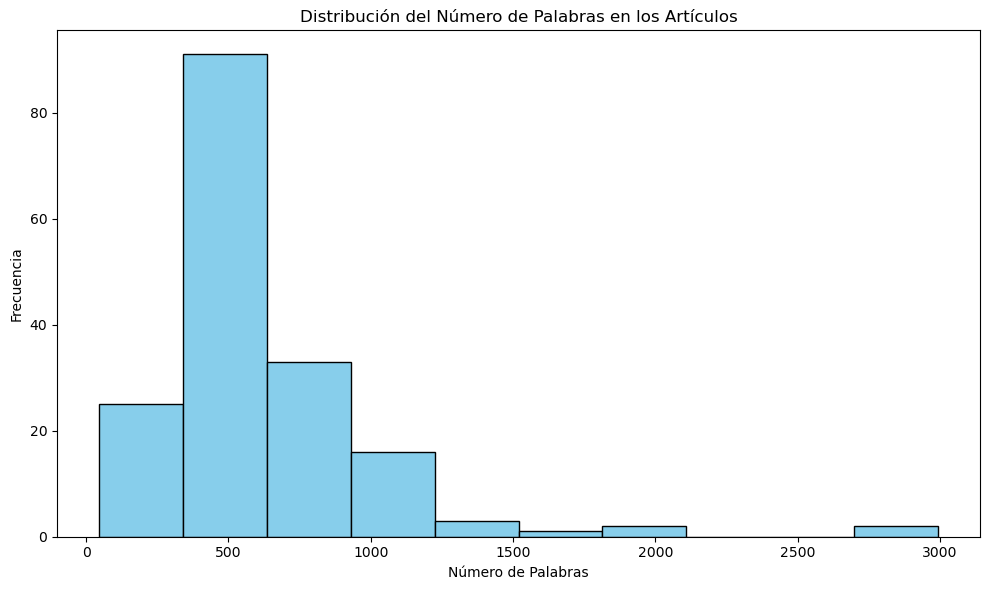

In [49]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

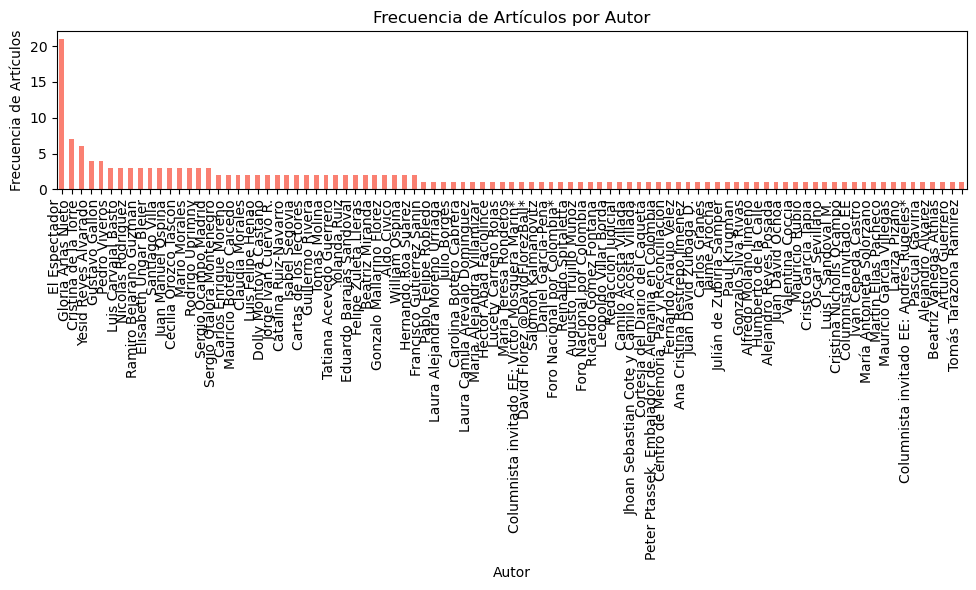

In [50]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
from datetime import datetime

# Diccionario de meses en español a inglés
meses = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

def convertir_fecha(fecha):
    # Elimina espacios no separables y limpia la cadena
    fecha = fecha.replace('\xa0', ' ').strip()

    # Extrae la parte de la fecha y la hora
    partes = fecha.split(' - ')
    fecha_str = partes[0].strip()
    hora_str = partes[1].strip()

    # Reemplaza el mes en español con el mes en inglés
    for espanol, ingles in meses.items():
        if espanol in fecha_str:
            fecha_str = fecha_str.replace(espanol, ingles)
            break

    # Elimina 'de' y corrige la cadena
    fecha_str = fecha_str.replace('de', '').strip()
    fecha_completa = f"{fecha_str} {hora_str}".replace(' a. m.', ' AM').replace(' p. m.', ' PM')
    
    try:
        return datetime.strptime(fecha_completa, '%d %B %Y %I:%M %p')
    except ValueError as e:
        print(f"Error al convertir la fecha: {fecha_completa} - {e}")
        return None

# Aplica la función de conversión
df['Fecha de Publicación'] = df['Fecha de Publicación'].apply(convertir_fecha)


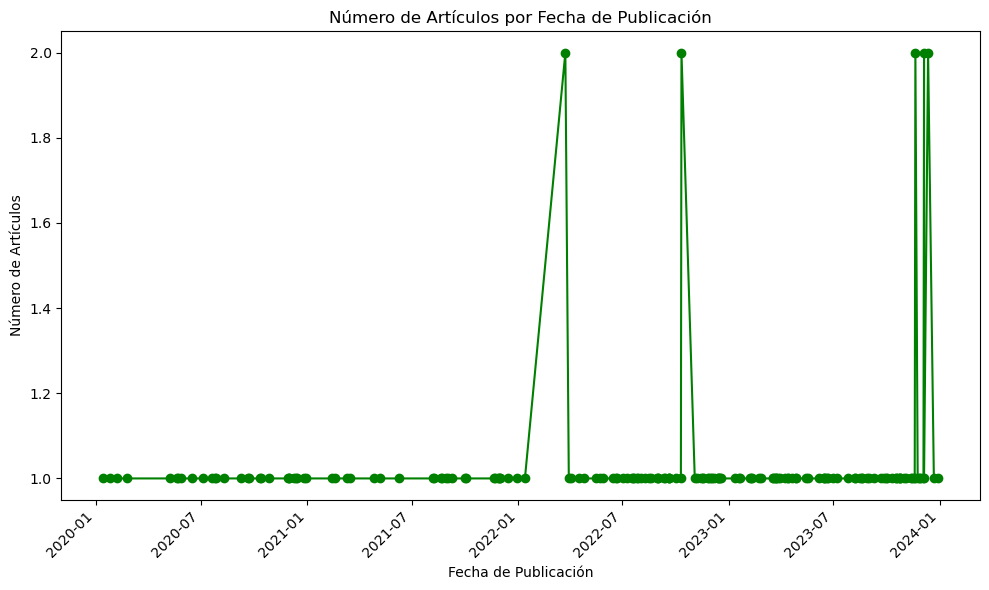

In [52]:
# Gráfica 3: Artículos por Fecha de Publicación
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoselespectador_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)